# One Hot Encoding

One hot encoding is one method of **converting categorical data to prepare it for an algorithm that takes in numerical variables** and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

While this is helpful for some ordinal situations, **some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance**. That’s when one hot encoding saves the day.

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/PH_Weather_v1.csv")
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [32]:
df_ohe = pd.get_dummies(df, columns=["clouds"], prefix="cld")

In [33]:
df_ohe

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity,cld_***,cld_BKN,cld_CLR,cld_OBS,cld_OVC,cld_SCT
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,15.6,0.75,0,1,0,0,0,0
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,6.2,0.94,0,0,0,0,1,0
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,6.2,0.80,0,1,0,0,0,0
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,6.2,0.80,0,0,0,0,1,0
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,11.2,0.88,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,7.5,0.80,0,1,0,0,0,0
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,7.5,0.86,0,1,0,0,0,0
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,7.5,0.80,0,1,0,0,0,0
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,7.5,0.77,0,1,0,0,0,0


# Bag of Words

In [5]:
import nltk  
import numpy as np  
import random  
import string, re
import seaborn as sns
import matplotlib.pyplot as plt

### A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms., Essentially what it does is OHE-ing the unique words of text and then summing them up.

In [6]:
badguy = []
with open('data/badguy.txt') as f:
    badguy = [line.rstrip() for line in f]

In [34]:
badguy

['White shirt now red, my bloody nose', "Sleeping, you're on your tippy toes", 'Creeping around like no one knows', "Think you're so criminal", 'Bruises, on both my knees for you', "Don't say thank you or please", "I do what I want when I'm wanting to", 'My soul? So cynical', "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight', 'Might seduce your dad type', "I'm the bad guy, duh", "I'm the bad guy", 'I like it when you take control', "Even if you know that you don't", "Own me, I'll let you play the role", "I'll be your animal", 'My mommy likes to sing along with me', "But she won't sing this song", 'If she reads all the lyrics', "She'll pity the men I know", "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight'

### Use **regex** to parse the corpus

`Short for regular expression, a regex is a string of text that lets you create patterns that help match, locate, and manage text.`

In [35]:
parsed_corpus = [[re.sub('[^A-Za-z0-9]+', '', word).lower() for word in sentence.split(" ")] for sentence in badguy]
# parsed_corpus[0]

In [36]:
%pprint
parsed_corpus

Pretty printing has been turned ON


[['white', 'shirt', 'now', 'red', 'my', 'bloody', 'nose'],
 ['sleeping', 'youre', 'on', 'your', 'tippy', 'toes'],
 ['creeping', 'around', 'like', 'no', 'one', 'knows'],
 ['think', 'youre', 'so', 'criminal'],
 ['bruises', 'on', 'both', 'my', 'knees', 'for', 'you'],
 ['dont', 'say', 'thank', 'you', 'or', 'please'],
 ['i', 'do', 'what', 'i', 'want', 'when', 'im', 'wanting', 'to'],
 ['my', 'soul', 'so', 'cynical'],
 ['so', 'youre', 'a', 'tough', 'guy'],
 ['like', 'it', 'really', 'rough', 'guy'],
 ['just', 'cant', 'get', 'enough', 'guy'],
 ['chest', 'always', 'so', 'puffed', 'guy'],
 ['im', 'that', 'bad', 'type'],
 ['make', 'your', 'mama', 'sad', 'type'],
 ['make', 'your', 'girlfriend', 'mad', 'tight'],
 ['might', 'seduce', 'your', 'dad', 'type'],
 ['im', 'the', 'bad', 'guy', 'duh'],
 ['im', 'the', 'bad', 'guy'],
 ['i', 'like', 'it', 'when', 'you', 'take', 'control'],
 ['even', 'if', 'you', 'know', 'that', 'you', 'dont'],
 ['own', 'me', 'ill', 'let', 'you', 'play', 'the', 'role'],
 ['ill', 

### Build a word frequency dictionary with words as keys and frequencies for values

In [37]:
%pprint
wordfreq = {}
for sentence in parsed_corpus:
    for word in sentence:
        if word not in wordfreq.keys():
            wordfreq[word] = 1
        else:
            wordfreq[word] += 1

Pretty printing has been turned OFF


In [38]:
wordfreq

{'white': 1, 'shirt': 1, 'now': 1, 'red': 1, 'my': 4, 'bloody': 1, 'nose': 1, 'sleeping': 1, 'youre': 5, 'on': 2, 'your': 9, 'tippy': 1, 'toes': 1, 'creeping': 1, 'around': 1, 'like': 5, 'no': 1, 'one': 1, 'knows': 1, 'think': 1, 'so': 6, 'criminal': 1, 'bruises': 1, 'both': 1, 'knees': 1, 'for': 1, 'you': 8, 'dont': 3, 'say': 1, 'thank': 1, 'or': 1, 'please': 1, 'i': 8, 'do': 1, 'what': 2, 'want': 1, 'when': 3, 'im': 13, 'wanting': 1, 'to': 2, 'soul': 1, 'cynical': 1, 'a': 5, 'tough': 2, 'guy': 16, 'it': 3, 'really': 2, 'rough': 2, 'just': 2, 'cant': 2, 'get': 3, 'enough': 2, 'chest': 2, 'always': 2, 'puffed': 2, 'that': 4, 'bad': 13, 'type': 6, 'make': 4, 'mama': 2, 'sad': 2, 'girlfriend': 2, 'mad': 3, 'tight': 2, 'might': 2, 'seduce': 2, 'dad': 2, 'the': 7, 'duh': 3, 'take': 1, 'control': 1, 'even': 1, 'if': 2, 'know': 2, 'own': 1, 'me': 3, 'ill': 2, 'let': 1, 'play': 1, 'role': 1, 'be': 1, 'animal': 1, 'mommy': 1, 'likes': 1, 'sing': 2, 'along': 1, 'with': 1, 'but': 2, 'she': 3, 'w

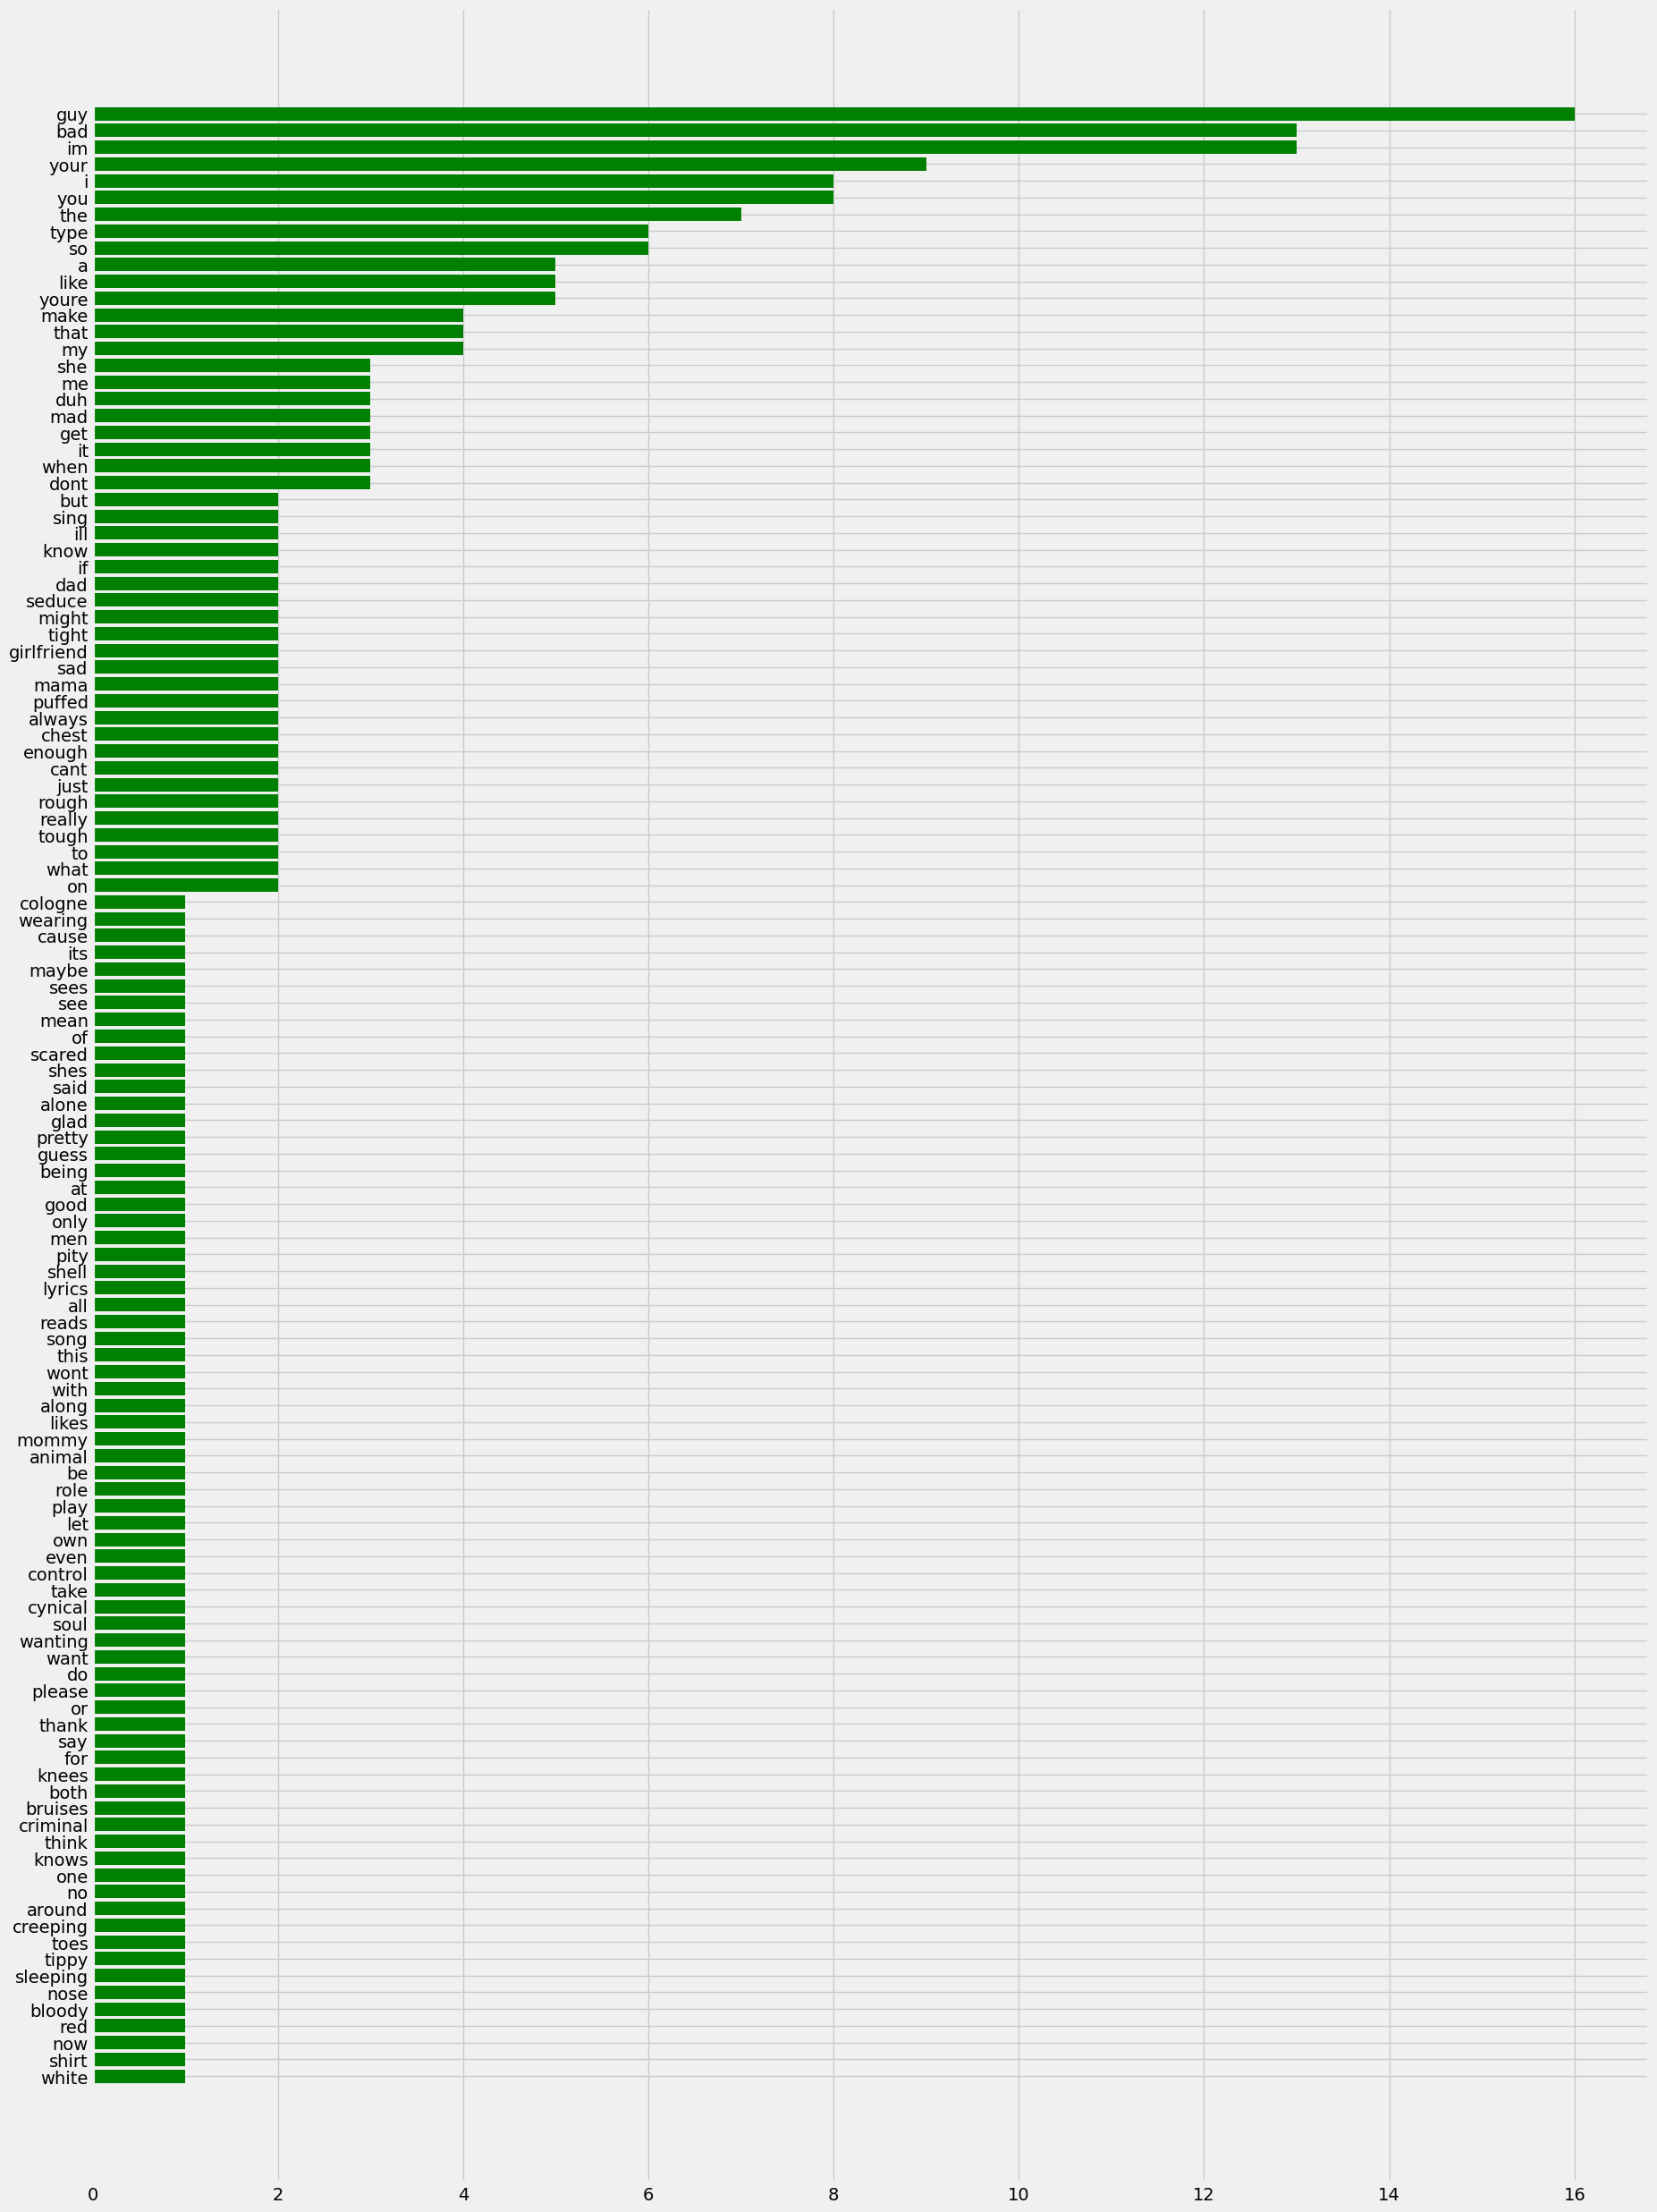

In [39]:
# Display a countplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,30))

wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1])}
countplot = plt.barh([ str(i) for i in wordfreq.keys()], wordfreq.values(), color='g')

In [41]:
wordfreq

{'white': 1, 'shirt': 1, 'now': 1, 'red': 1, 'bloody': 1, 'nose': 1, 'sleeping': 1, 'tippy': 1, 'toes': 1, 'creeping': 1, 'around': 1, 'no': 1, 'one': 1, 'knows': 1, 'think': 1, 'criminal': 1, 'bruises': 1, 'both': 1, 'knees': 1, 'for': 1, 'say': 1, 'thank': 1, 'or': 1, 'please': 1, 'do': 1, 'want': 1, 'wanting': 1, 'soul': 1, 'cynical': 1, 'take': 1, 'control': 1, 'even': 1, 'own': 1, 'let': 1, 'play': 1, 'role': 1, 'be': 1, 'animal': 1, 'mommy': 1, 'likes': 1, 'along': 1, 'with': 1, 'wont': 1, 'this': 1, 'song': 1, 'reads': 1, 'all': 1, 'lyrics': 1, 'shell': 1, 'pity': 1, 'men': 1, 'only': 1, 'good': 1, 'at': 1, 'being': 1, 'guess': 1, 'pretty': 1, 'glad': 1, 'alone': 1, 'said': 1, 'shes': 1, 'scared': 1, 'of': 1, 'mean': 1, 'see': 1, 'sees': 1, 'maybe': 1, 'its': 1, 'cause': 1, 'wearing': 1, 'cologne': 1, 'on': 2, 'what': 2, 'to': 2, 'tough': 2, 'really': 2, 'rough': 2, 'just': 2, 'cant': 2, 'enough': 2, 'chest': 2, 'always': 2, 'puffed': 2, 'mama': 2, 'sad': 2, 'girlfriend': 2, 'ti

In [43]:
# Get top 100 words
import heapq 

freq_words = heapq.nlargest(100, wordfreq, key=wordfreq.get)

In [44]:
freq_words

['guy', 'im', 'bad', 'your', 'you', 'i', 'the', 'so', 'type', 'youre', 'like', 'a', 'my', 'that', 'make', 'dont', 'when', 'it', 'get', 'mad', 'duh', 'me', 'she', 'on', 'what', 'to', 'tough', 'really', 'rough', 'just', 'cant', 'enough', 'chest', 'always', 'puffed', 'mama', 'sad', 'girlfriend', 'tight', 'might', 'seduce', 'dad', 'if', 'know', 'ill', 'sing', 'but', 'white', 'shirt', 'now', 'red', 'bloody', 'nose', 'sleeping', 'tippy', 'toes', 'creeping', 'around', 'no', 'one', 'knows', 'think', 'criminal', 'bruises', 'both', 'knees', 'for', 'say', 'thank', 'or', 'please', 'do', 'want', 'wanting', 'soul', 'cynical', 'take', 'control', 'even', 'own', 'let', 'play', 'role', 'be', 'animal', 'mommy', 'likes', 'along', 'with', 'wont', 'this', 'song', 'reads', 'all', 'lyrics', 'shell', 'pity', 'men', 'only', 'good']

In [57]:
parsed_corpus[0]

['white', 'shirt', 'now', 'red', 'my', 'bloody', 'nose']

In [46]:
sentence_vectors = []
for sentence in parsed_corpus:
    sent_vec = []
    for token in freq_words:
        if token in sentence:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [58]:
sentence_vectors[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [60]:
len(sentence_vectors[0])

100

### Now we can work with text data comparatively!

In [63]:
print(badguy[16])
print(badguy[17])

I'm the bad guy, duh
I'm the bad guy


In [65]:
sentence_vectors[16]

[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
sentence_vectors[17]

[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Our first similarity metric!

Cosine Similarity is a **measurement that quantifies the similarity between two or more vectors**. The cosine similarity is the cosine of the angle between vectors. The vectors are typically non-zero and are within an inner product space.

The cosine similarity is described mathematically as the division between the dot product of vectors and the product of the euclidean norms or magnitude of each vector.

!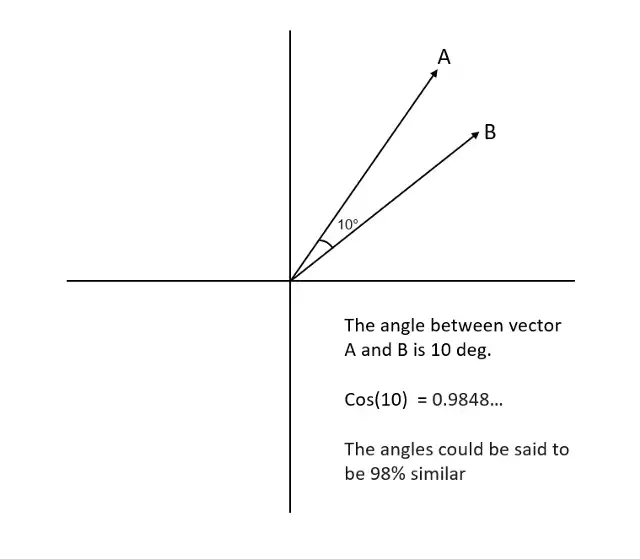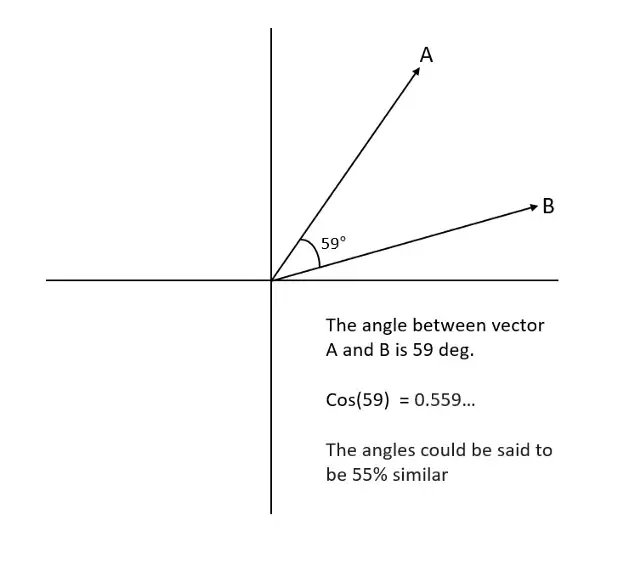

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

a = sentence_vectors[16]
b = sentence_vectors[17]

cosine_similarity([a],[b])

array([[0.89442719]])